In [2]:
## Catalog search 

import numpy as np
import geopandas as gpd
import rioxarray as rioxr
import matplotlib.pyplot as plt
import contextily as ctx
import rasterio
from rasterio.plot import show as rioshow
from shapely.geometry import box
import xarray as xr


from shapely.geometry import Polygon

# used to access STAC catalogs
from pystac_client import Client
# used to sign items from the MPC STAC catalog
import planetary_computer

# ----- other libraries for nice ouputs
from IPython.display import Image


In [3]:
catalog = Client.open("https://planetarycomputer.microsoft.com/api/stac/v1",
                      modifier = planetary_computer.sign_inplace)
#temporal range of interest
time_range = '2017/2020'
#Bounding Box Coordinates (as a GeoJSON)
bbox = [-112.826843, 32.974108, -111.184387, 33.863574]
#Catalog search
search = catalog.search(
    collections = ['io-biodiversity'],
    bbox = bbox,
    datetime = time_range
)
items = search.item_collection()
items
#Number of items in the search:
len(items)

4

<Axes: >

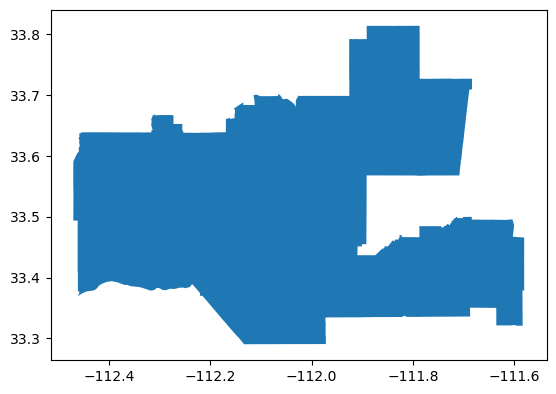

In [4]:
arizona = gpd.read_file('data/tl_2022_04_cousub/tl_2022_04_cousub.shp')
arizona.head()
phoenix = arizona[arizona['NAME'] == "Phoenix"]
phoenix.plot()

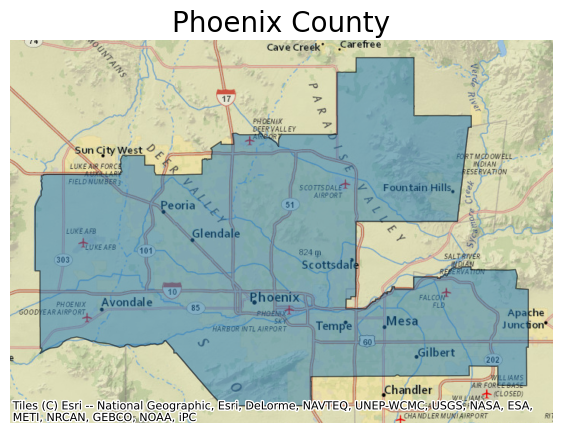

In [5]:
# create axis with plot
ax = (phoenix.to_crs(epsg=3857)
      .plot(figsize=(7, 7), alpha=0.5, edgecolor="k")
      )

# add NatGeo basemap from contextily
ctx.add_basemap(ax, source=ctx.providers.Esri.NatGeoWorldMap)

# update axes
ax.set_title("Phoenix County", fontdict={"fontsize": "20"})
ax.set_axis_off()

In [5]:
phoenix.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [6]:
items

In [6]:
ph_2017 = items[3]
ph_2020 = items[0]

In [8]:
ph_2017

<Item id=bii_2017_34.74464974521749_-115.38597824385106_cog>

In [9]:
ph_2020
#clip this to phenix geometry and plot 

<Item id=bii_2020_34.74464974521749_-115.38597824385106_cog>

In [7]:
ph_2017 = rioxr.open_rasterio(ph_2017.assets['data'].href)

In [8]:
ph_2020 = rioxr.open_rasterio(ph_2020.assets['data'].href)


In [12]:
#ph_2017 = rioxr.open_rasterio(ph_2017.assets['rendered_preview'].href)

In [13]:
#total_ph = ph_2017 - ph_2020

In [14]:
#total_ph.plot()

In [9]:
#did not drop bands 

# original dimensions and coordinates
print(ph_2017.dims, ph_2017.coords,'\n')

# remove length 1 dimension (band)
ph_2017 = ph_2017.squeeze()
print(ph_2017.dims, ph_2017.coords,'\n')

# remove coordinates associated to band
ph_2017 = ph_2017.drop('band')
print(ph_2017.dims, ph_2017.coords)

('band', 'y', 'x') Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -115.4 -115.4 -115.4 ... -108.2 -108.2 -108.2
  * y            (y) float64 34.74 34.74 34.74 34.74 ... 27.57 27.57 27.57 27.57
    spatial_ref  int64 0 

('y', 'x') Coordinates:
    band         int64 1
  * x            (x) float64 -115.4 -115.4 -115.4 ... -108.2 -108.2 -108.2
  * y            (y) float64 34.74 34.74 34.74 34.74 ... 27.57 27.57 27.57 27.57
    spatial_ref  int64 0 

('y', 'x') Coordinates:
  * x            (x) float64 -115.4 -115.4 -115.4 ... -108.2 -108.2 -108.2
  * y            (y) float64 34.74 34.74 34.74 34.74 ... 27.57 27.57 27.57 27.57
    spatial_ref  int64 0


In [10]:
# original dimensions and coordinates
print(ph_2020.dims, ph_2020.coords,'\n')

# remove length 1 dimension (band)
ph_2020 = ph_2020.squeeze()
print(ph_2020.dims, ph_2020.coords,'\n')

# remove coordinates associated to band
ph_2020 = ph_2020.drop('band')
print(ph_2020.dims, ph_2020.coords)

('band', 'y', 'x') Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -115.4 -115.4 -115.4 ... -108.2 -108.2 -108.2
  * y            (y) float64 34.74 34.74 34.74 34.74 ... 27.57 27.57 27.57 27.57
    spatial_ref  int64 0 

('y', 'x') Coordinates:
    band         int64 1
  * x            (x) float64 -115.4 -115.4 -115.4 ... -108.2 -108.2 -108.2
  * y            (y) float64 34.74 34.74 34.74 34.74 ... 27.57 27.57 27.57 27.57
    spatial_ref  int64 0 

('y', 'x') Coordinates:
  * x            (x) float64 -115.4 -115.4 -115.4 ... -108.2 -108.2 -108.2
  * y            (y) float64 34.74 34.74 34.74 34.74 ... 27.57 27.57 27.57 27.57
    spatial_ref  int64 0


In [1]:
bi_threshold = 0.75
above_thresh_2017 = ph_2017 >= bi_threshold 
above_thresh_2020 = ph_2020 >= bi_threshold

NameError: name 'ph_2017' is not defined

In [ ]:
above_thresh_2017 = above_thresh_2017.astype(int)
above_thresh_2020 = above_thresh_2020.astype(int)

total_2017 = np.sum(ph_2017)
total_2017

total_2020 = np.sum(ph_2020)
total_2020 


In [ ]:
percent_2017 = (np.sum(above_thresh_2017 / total_2017)) * 100  #diff variable when all vales are 1 over all pixels that are  and 1 
percent_2020 = (np.sum(above_thresh_2020 / total_2020)) * 100


#

percent_2017
percent_2020

In [ ]:
lost_pixels = above_thresh_2017 - above_thresh_2020 # == 1 
#diff == diff = 1
print(np.sum(lost_pixels))

<xarray.DataArray ()>
array(96266)
Coordinates:
    spatial_ref  int64 0


In [ ]:
phoenix = phoenix.to_crs(lost_pixels.rio.crs)

In [ ]:
#do this in a previou ss tep? 
lost_pixels = lost_pixels.rio.clip(phoenix.geometry, phoenix.crs)
above_thresh_2017 = above_thresh_2020.rio.clip(phoenix.geometry, phoenix.crs)

/Users/katebecker/anaconda3/envs/mpc-env/lib/python3.11/site-packages/xarray/core/duck_array_ops.py:201: RuntimeWarning: invalid value encountered in cast
  return data.astype(dtype, **kwargs)
/Users/katebecker/anaconda3/envs/mpc-env/lib/python3.11/site-packages/xarray/core/duck_array_ops.py:201: RuntimeWarning: invalid value encountered in cast
  return data.astype(dtype, **kwargs)


In [ ]:
type(lost_pixels)
type(phoenix)
type(above_thresh_2017)

xarray.core.dataarray.DataArray

/Users/katebecker/anaconda3/envs/mpc-env/lib/python3.11/site-packages/xarray/plot/utils.py:245: RuntimeWarning: overflow encountered in scalar absolute
  vlim = max(abs(vmin - center), abs(vmax - center))


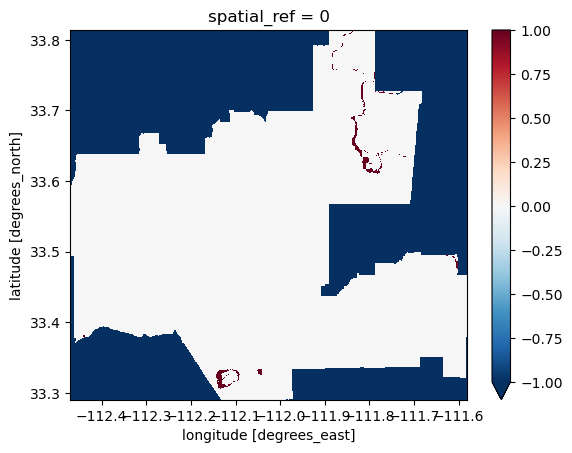

In [ ]:
lost_pixels.plot() #i want to plot this and plot phoenix shapefile 

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

ax.axis('off')

phoenix.plot(ax=ax, edgecolor='0.7')
ph_2020.plot(ax=ax, legend=True) #raster 
lost_pixels.plot(ax=ax, color='red')

plt.show()

#use mpatches